# Sentiment Analysis with Naive Bayes Method

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import copy , math 
from bs4 import BeautifulSoup
import re
import nltk 
import spacy 
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob 
from textblob import Word 


C:\Users\babul\AppData\Local\Temp\ipykernel_2204\3066946799.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('Twitter_Data.csv')
df.sample(7)

,clean_text,category
109078,modi the real leader our country which country...,1.0
97553,true that very crafty pretended right winger a...,1.0
35205,living support modi,0.0
38796,your opinion modi government cnn may benefit o...,0.0
49541,team leave for assist authorities extradition ...,0.0
91527,hope one gets trapped his lies aznd vote for modi,-1.0
78304,five stages living through modis address the n...,0.0


In [3]:
print(f'the shape of dataset is : {df.shape}')

print(f'the columns are : {df.columns}')

the shape of dataset is : (162980, 2)
the columns are : Index(['clean_text', 'category'], dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [5]:
df['category'].value_counts()

category
 1.0    72250
 0.0    55213
-1.0    35510
Name: count, dtype: int64

In [6]:
# Missing rows removed 

df.dropna(inplace=True)
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


# Creating a copy of dataframe df , named new_df which contains only 70,000 dataset

In [7]:

new_dataframe_class_0 = df[df['category'] == -1].head(35000)
new_dataframe_class_1 = df[df['category'] == 1].head(35000)

new_df = pd.concat([new_dataframe_class_0, new_dataframe_class_1])

new_df = new_df.sample(frac=1).reset_index(drop=True)
new_df

,clean_text,category
0,mam happy with 72k modi government already hel...,1.0
1,that the reason all chord are upset they canno...,1.0
2,reaffirms significance mnrega providing securi...,-1.0
3,all this are good plans only executed professi...,1.0
4,new video the newshour debate modi announces m...,1.0
...,...,...
69995,invite you join support coming general electio...,1.0
69996,india attains the capability target destroy sp...,-1.0
69997,random poll take chill pill modi our next,-1.0
69998,praise khichdi the general election draws clos...,1.0


In [8]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   clean_text  70000 non-null  object 
 1   category    70000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.1+ MB


#  Final DataFrame

In [9]:

new_df['category'] = new_df['category'].replace(-1, 0)

# Removing HTML strips, square bracets from the dataset

In [38]:
def strip_html(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()


def remove_square_brackets(text):
    return re.sub('\[[^]]*\]','', text)


def denoise_text(text):
    text = strip_html(text)
    text = remove_square_brackets(text)
    return text

#Applying the function 
new_df['clean_text'] = new_df['clean_text'].apply(denoise_text)

new_df['clean_text']

C:\Users\babul\AppData\Local\Temp\ipykernel_2204\4164170598.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


0        mam happy with 72k modi government already hel...
1        that the reason all chord are upset they canno...
2        reaffirms significance mnrega providing securi...
3        all this are good plans only executed professi...
4        new video the newshour debate modi announces m...
                               ...                        
69995    invite you join support coming general electio...
69996    india attains the capability target destroy sp...
69997           random poll take chill pill modi our next 
69998    praise khichdi the general election draws clos...
69999    today morning news feed was the feed used news...
Name: clean_text, Length: 70000, dtype: object

# Function to remove special character 

In [39]:

def remove_special_character(text, remove_digits = True):
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern, '', text)
    return text 

new_df['clean_text'] = new_df['clean_text'].apply(remove_special_character)

new_df['clean_text']

0        mam happy with 72k modi government already hel...
1        that the reason all chord are upset they canno...
2        reaffirms significance mnrega providing securi...
3        all this are good plans only executed professi...
4        new video the newshour debate modi announces m...
                               ...                        
69995    invite you join support coming general electio...
69996    india attains the capability target destroy sp...
69997           random poll take chill pill modi our next 
69998    praise khichdi the general election draws clos...
69999    today morning news feed was the feed used news...
Name: clean_text, Length: 70000, dtype: object

# Tokenization and removal of stopwords from the dataset

In [40]:
class SpaCyTokenizer:
    def __init__(self):
        self.nlp = spacy.load("en_core_web_sm")

    def tokenize(self, text):
        doc = self.nlp(text)
        return [token.text for token in doc]

In [41]:

# Setting English StopWords 

default_stopwords = set(stopwords.words('english'))

custom_stopwords = set(['not', 'no', 'against', 'nor'])

stopword_list = default_stopwords - custom_stopwords

print(stopword_list)

tokenizer = SpaCyTokenizer()


def remove_stopwords(text, is_lower_case = False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]

    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text 

new_df['clean_text'] = new_df['clean_text'].apply(remove_stopwords)

new_df['clean_text']

{'it', 'will', 'through', "aren't", 'some', 'ma', 'll', 'has', 'he', 'myself', 'other', 'should', 'from', 'to', 'and', 'because', "doesn't", 'whom', 'am', 'which', 'here', 'my', 'very', 'doesn', 'these', 'she', 've', 'been', 'them', 'out', 'yourself', 'into', 'what', "couldn't", 'himself', 'between', 'his', 'i', 'were', 'who', 'hers', "you've", 'haven', 'hasn', "won't", 'that', 'isn', 'was', 'can', "isn't", 'doing', 'wouldn', 'ours', 'too', 'don', 'while', 'during', 'themselves', 'off', 'did', 'once', 'than', "didn't", 'yourselves', 'won', 'such', 'as', 'this', 'your', 'above', 't', 'down', "wasn't", 'at', 'me', 'are', 'does', 'but', 'any', "hadn't", "haven't", 'with', 'is', 'theirs', 'own', "weren't", 'by', 'now', 'each', 'until', 'both', 'same', 'yours', 'weren', 'so', "you'd", 'again', "don't", 'when', 'couldn', 'have', "hasn't", 'herself', 'an', 'or', "mightn't", 'further', 'its', "you're", 'up', 'shouldn', 'being', 'our', 'below', 'just', "shouldn't", 'few', 'her', 'mustn', 'shan'

0        mam happy 72k modi government already helping ...
1        reason chord upset not loot fooling people aga...
2        reaffirms significance mnrega providing securi...
3        good plans executed professionaly without vest...
4        new video newshour debate modi announces missi...
                               ...                        
69995    invite join support coming general elections v...
69996    india attains capability target destroy space ...
69997                random poll take chill pill modi next
69998    praise khichdi general election draws closer d...
69999    today morning news feed feed used newsx modi m...
Name: clean_text, Length: 70000, dtype: object

# Here We are saving the preprocessed data, which we can use to avoid the computational cost

In [ ]:
new_df.to_csv('Cleaned_twitter_data.csv')

In [13]:
new_df1 = pd.read_csv('Cleaned_twitter_data.csv')

new_df1

,Unnamed: 0,clean_text,category
0,0,modi deadly formno oppn face,0.0
1,1,much stupidity shows jealous modis success unf...,0.0
2,2,social media lampoons modi evolution chowkidar...,1.0
3,3,arnav want waste breath rahul afzal masood dre...,0.0
4,4,model code violation serious wonder modi held ...,0.0
...,...,...,...
69995,69995,sir nt find truth help exposing modi chapter c...,0.0
69996,69996,way praise rahul four foolishness criticise mo...,1.0
69997,69997,committed assam accord deportation illegal im...,0.0
69998,69998,chor chaukidar isliye youth berojgar total cro...,0.0


# Generating the word cloud for better visualisation

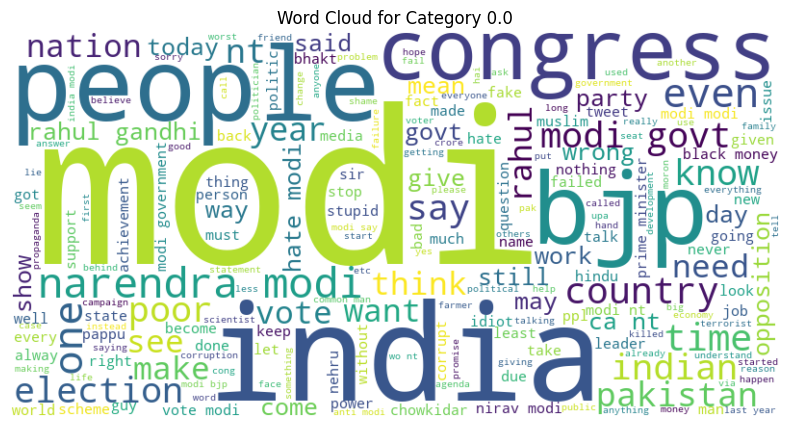

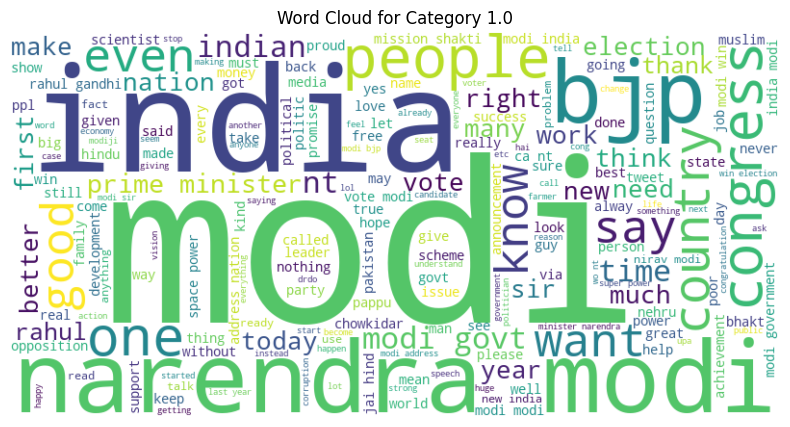

In [16]:
def generate_wordcloud(category):
    text = ' '.join(new_df1[new_df1['category'] == category]['clean_text'].astype(str))  # Convert to strings
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category {category}')
    plt.axis('off')
    plt.show()

# Generate word cloud for each category
unique_categories = new_df1['category'].unique()
for category in unique_categories:
    generate_wordcloud(category)


# Making a Word frequency dataframe

In [ ]:

all_words = ' '.join(new_df1['clean_text']).split()
unique_words = set(all_words)

word_freq_df = pd.DataFrame(columns=['unique_word', 'positive', 'negative'])

for word in unique_words:
    positive_count = sum((new_df1['category'] == 1) & (new_df1['clean_text'].str.contains(re.escape(word))))
    negative_count = sum((new_df1['category'] == 0) & (new_df1['clean_text'].str.contains(re.escape(word))))
    
    word_freq_df = pd.concat([word_freq_df, pd.DataFrame({'unique_word': [word], 'positive': [positive_count], 'negative': [negative_count]})])


word_freq_df['total'] = word_freq_df['positive'] + word_freq_df['negative']

print(word_freq_df.head())


# As I have saved the result earlier, I will simply read it

In [18]:
word_frequency = pd.read_csv("Word_frequncy_matrix.csv")

word_frequency

,unique_word,positive,negative,total
0,yogis,3,2,5
1,amuch,0,1,1
2,jinaidu,1,0,1
3,yelling,2,4,6
4,scientistsby,1,0,1
...,...,...,...,...
66729,ganjam,0,1,1
66730,23march,1,0,1
66731,stigmas,0,1,1
66732,fingers,18,26,44


Now, counting the total number of unique word in positive column, in negative column and total number of unique words in the column

In [23]:
#Sum of unique words in positive sentiment and negative sentiment
positive_sum = word_frequency['positive'].sum()
negative_sum = word_frequency['negative'].sum()

print("Total no. of words in Positive sentiment", positive_sum)
print("Total no. of words in Negative sentiment", negative_sum)

total_unique_words = len(word_frequency)
print("Total number of unique words", total_unique_words)

Total no. of words in Positive sentiment 2303534
Total no. of words in Negative sentiment 2414592
Total number of unique words 66734


# Now We are going to use Laplacian Smoothing for avoiding zero probabilities

Laplacian Smoothing 

p(w|pos) = (freq(w, positive) + 1) / (positive_sum + total_unique_words) 

p(w|neg) = (freq(w, negative) + 1) / (negative_sum + total_unique_words) 

In [25]:
alpha = 1

word_frequency['p(w|pos)'] = (word_frequency['positive'] + alpha) / (positive_sum+ total_unique_words)

word_frequency['p(w|neg)'] = (word_frequency['negative'] + alpha) / (negative_sum + total_unique_words)

word_frequency.head()

,unique_word,positive,negative,total,p(w|pos),p(w|neg)
0,yogis,3,2,5,1.687573e-06,1.209031e-06
1,amuch,0,1,1,4.218932e-07,8.060207e-07
2,jinaidu,1,0,1,8.437864e-07,4.030103e-07
3,yelling,2,4,6,1.265680e-06,2.015052e-06
4,scientistsby,1,0,1,8.437864e-07,4.030103e-07


# Now, We will Calculate Log Likelihood (Lambda score)

Lambda Score or Log likelihood

Lambda(w) = log(ratio_w)

ratio_w = p(w|pos) / p(w|neg)

In [26]:
prob_pos = word_frequency['p(w|pos)']

prob_neg = word_frequency['p(w|neg)']

ratio_w = prob_pos / prob_neg

lambda_w = np.log(ratio_w)

word_frequency['lambda_score'] = lambda_w

word_frequency

,unique_word,positive,negative,total,p(w|pos),p(w|neg),lambda_score
0,yogis,3,2,5,1.687573e-06,1.209031e-06,0.333472
1,amuch,0,1,1,4.218932e-07,8.060207e-07,-0.647357
2,jinaidu,1,0,1,8.437864e-07,4.030103e-07,0.738937
3,yelling,2,4,6,1.265680e-06,2.015052e-06,-0.465036
4,scientistsby,1,0,1,8.437864e-07,4.030103e-07,0.738937
...,...,...,...,...,...,...,...
66729,ganjam,0,1,1,4.218932e-07,8.060207e-07,-0.647357
66730,23march,1,0,1,8.437864e-07,4.030103e-07,0.738937
66731,stigmas,0,1,1,4.218932e-07,8.060207e-07,-0.647357
66732,fingers,18,26,44,8.015971e-06,1.088128e-05,-0.305608


In [27]:
word_frequency.to_csv("Word_frequency_with_lambda_score.csv")

# it is important for unbalanced dataset

log_prior = log(ratio_pos_neg)

ratio_pos_neg = p(pos) / p(neg) 

here we will get the value of log_prior as '0'.cauz i have taken a balanced data as 35000 data of 1 and 35000 data for 0.

In [32]:
num_pos_tweets = sum(new_df1['category'] == 1)

num_neg_tweets = sum(new_df1['category'] == 0)

ratio_pos_neg = num_pos_tweets / num_neg_tweets

log_prior = np.log(ratio_pos_neg)

print("The value of log_prior is :", log_prior)

with open('log_prior.txt', 'w') as file:
    file.write(str(log_prior))

The value of log_prior is : 0.0


# Here, Making a Preprocessing function for preprocessing the input data for testing purpose

In [51]:
class SpaCyTokenizer:
    def __init__(self):
        self.nlp = spacy.load("en_core_web_sm")

    def tokenize(self, text):
        doc = self.nlp(text)
        return [token.text for token in doc]

def preprocess_text(text):
    # Strip HTML
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()
    
    # Remove square brackets
    text = re.sub('\[[^]]*\]', '', text)
    
    # Remove noisy text
    text = re.sub('\s+', ' ', text)
    
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove stopwords
    default_stopwords = set(stopwords.words('english'))

    custom_stopwords = set(['not', 'no', 'against', 'nor'])
    
    stopword_list = default_stopwords - custom_stopwords
    
    tokenizer = SpaCyTokenizer()
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    text = ' '.join(filtered_tokens)
    
    # Stemming
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    
    return text


# Function for predicting sentiment for some input tweet

In [56]:

def preprocess_input_tweet(input_tweet):

    processed_text = preprocess_text(input_tweet)

    return processed_text

def compute_log_likelihood(processed_text, word_frequency):
    
    words = processed_text.split()

    log_like_pos = 0
    log_like_neg = 0

    for word in words:
        if word in word_frequency['unique_word'].values:
            
            lambda_w = word_frequency.loc[word_frequency['unique_word'] == word, 'lambda_score'].values[0]
            
            log_like_pos += lambda_w if lambda_w > 0 else 0

            log_like_neg += -lambda_w if lambda_w < 0 else 0

    return log_like_pos, log_like_neg


def predict_sentiment(log_like_pos, log_like_neg, log_prior):

    log_like_pos += log_prior

    log_like_neg += log_prior

    predicted_class = 1 if log_like_pos > log_like_neg else 0

    return predicted_class

input_tweet = input("Enter a tweet: ")

preprocessed_input = preprocess_input_tweet(input_tweet)

log_like_pos, log_like_neg = compute_log_likelihood(preprocessed_input, word_frequency)

predicted_class = predict_sentiment(log_like_pos, log_like_neg, log_prior)

print(input_tweet)

if predicted_class == 1:
    print("Positive sentiment!")
else:
    print("Negative sentiment!")


USA is powerful nation
Positive sentiment!


# Create a DataFrame with the remaining tweets for testing

In [58]:
remaining_tweets = df[~df.index.isin(new_df.index)].head(4000)

# Create a new column for predicted labels in the remaining_tweets DataFrame
remaining_tweets['predicted_target'] = remaining_tweets['clean_text'].apply(lambda tweet: predict_sentiment(*calculate_log_likelihood(preprocess_input_tweet(tweet), word_frequency), log_prior=log_prior))

# Calculate accuracy
accuracy = sum(remaining_tweets['category'] == remaining_tweets['predicted_target']) / len(remaining_tweets)

# Display the accuracy 
print(f"Accuracy on remaining tweets: {accuracy * 100:.2f}%")

Accuracy on remaining tweets: 40.00%
